In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

In [2]:
df =pd.read_csv('corona.csv')

In [3]:
df

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1081,2.0,2/25/2020,NaN,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.0,NaN,...,0,NaN,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...,NaN,NaN,NaN,NaN,NaN,NaN
1081,1082,1.0,2/24/2020,NaN,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.0,NaN,...,0,NaN,Fox News,https://www.foxnews.com/health/afghanistan-fir...,NaN,NaN,NaN,NaN,NaN,NaN
1082,1083,1.0,2/26/2020,NaN,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,NaN,...,0,NaN,South China Morning Post,https://www.scmp.com/news/china/society/articl...,NaN,NaN,NaN,NaN,NaN,NaN
1083,1084,1.0,2/25/2020,NaN,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,NaN,NaN,...,0,NaN,Reuters,https://www.reuters.com/article/us-croatia-cor...,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1085 non-null   int64  
 1   case_in_country        888 non-null    float64
 2   reporting date         1084 non-null   object 
 3   Unnamed: 3             0 non-null      float64
 4   summary                1080 non-null   object 
 5   location               1085 non-null   object 
 6   country                1085 non-null   object 
 7   gender                 902 non-null    object 
 8   age                    843 non-null    float64
 9   symptom_onset          563 non-null    object 
 10  If_onset_approximated  560 non-null    float64
 11  hosp_visit_date        507 non-null    object 
 12  exposure_start         128 non-null    object 
 13  exposure_end           341 non-null    object 
 14  visiting Wuhan         1085 non-null   int64  
 15  from

In [5]:
df.drop(['id','Unnamed: 3','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26'],axis=1,inplace=True)
df

,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
0,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,NaN,01/12/20,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,NaN,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,0.0,1/17/2020,NaN,01/03/20,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,1/19/2020,NaN,NaN,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
4,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,1/14/2020,NaN,NaN,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,2.0,2/25/2020,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.0,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,NaN,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...
1081,1.0,2/24/2020,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.0,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,NaN,Fox News,https://www.foxnews.com/health/afghanistan-fir...
1082,1.0,2/26/2020,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,NaN,NaN,NaN,NaN,2/17/2020,0,0.0,0,0,NaN,South China Morning Post,https://www.scmp.com/news/china/society/articl...
1083,1.0,2/25/2020,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,NaN,NaN,NaN,NaN,2/19/2020,2/21/2020,0,0.0,0,0,NaN,Reuters,https://www.reuters.com/article/us-croatia-cor...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_in_country        888 non-null    float64
 1   reporting date         1084 non-null   object 
 2   summary                1080 non-null   object 
 3   location               1085 non-null   object 
 4   country                1085 non-null   object 
 5   gender                 902 non-null    object 
 6   age                    843 non-null    float64
 7   symptom_onset          563 non-null    object 
 8   If_onset_approximated  560 non-null    float64
 9   hosp_visit_date        507 non-null    object 
 10  exposure_start         128 non-null    object 
 11  exposure_end           341 non-null    object 
 12  visiting Wuhan         1085 non-null   int64  
 13  from Wuhan             1081 non-null   float64
 14  death                  1085 non-null   object 
 15  reco

In [7]:
df.isna().sum()

case_in_country          197
reporting date             1
summary                    5
location                   0
country                    0
gender                   183
age                      242
symptom_onset            522
If_onset_approximated    525
hosp_visit_date          578
exposure_start           957
exposure_end             744
visiting Wuhan             0
from Wuhan                 4
death                      0
recovered                  0
symptom                  815
source                     0
link                       0
dtype: int64

In [8]:
df['reporting date'].fillna(df['reporting date'].mode()[0] , inplace=True)


In [9]:
df.isna().sum()

case_in_country          197
reporting date             0
summary                    5
location                   0
country                    0
gender                   183
age                      242
symptom_onset            522
If_onset_approximated    525
hosp_visit_date          578
exposure_start           957
exposure_end             744
visiting Wuhan             0
from Wuhan                 4
death                      0
recovered                  0
symptom                  815
source                     0
link                       0
dtype: int64

In [10]:
df

,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
0,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,NaN,01/12/20,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,NaN,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,0.0,1/17/2020,NaN,01/03/20,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,1/19/2020,NaN,NaN,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
4,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,1/14/2020,NaN,NaN,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,2.0,2/25/2020,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.0,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,NaN,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...
1081,1.0,2/24/2020,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.0,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,NaN,Fox News,https://www.foxnews.com/health/afghanistan-fir...
1082,1.0,2/26/2020,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,NaN,NaN,NaN,NaN,2/17/2020,0,0.0,0,0,NaN,South China Morning Post,https://www.scmp.com/news/china/society/articl...
1083,1.0,2/25/2020,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,NaN,NaN,NaN,NaN,2/19/2020,2/21/2020,0,0.0,0,0,NaN,Reuters,https://www.reuters.com/article/us-croatia-cor...


In [11]:
df.drop('symptom',axis=1,inplace=True)

In [12]:
df.drop(['exposure_end','exposure_start'],axis=1,inplace=True)

In [13]:
df.isna().sum()

case_in_country          197
reporting date             0
summary                    5
location                   0
country                    0
gender                   183
age                      242
symptom_onset            522
If_onset_approximated    525
hosp_visit_date          578
visiting Wuhan             0
from Wuhan                 4
death                      0
recovered                  0
source                     0
link                       0
dtype: int64

In [14]:
df.dropna(subset=['summary','from Wuhan'],inplace=True)

In [15]:
df.isna().sum()

case_in_country          193
reporting date             0
summary                    0
location                   0
country                    0
gender                   182
age                      241
symptom_onset            521
If_onset_approximated    524
hosp_visit_date          577
visiting Wuhan             0
from Wuhan                 0
death                      0
recovered                  0
source                     0
link                       0
dtype: int64

In [16]:
df.describe()

,case_in_country,age,If_onset_approximated,visiting Wuhan,from Wuhan
count,887.000000,839.000000,556.000000,1080.000000,1080.000000
mean,48.866967,49.545590,0.043165,0.175926,0.144444
std,78.894280,18.207504,0.203412,0.380934,0.351703
min,1.000000,0.250000,0.000000,0.000000,0.000000
25%,11.000000,35.000000,0.000000,0.000000,0.000000
50%,28.000000,51.000000,0.000000,0.000000,0.000000
75%,67.500000,64.000000,0.000000,0.000000,0.000000
max,1443.000000,96.000000,1.000000,1.000000,1.000000


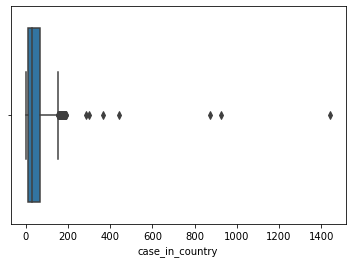

In [17]:
sns.boxplot(x='case_in_country',data=df)

In [18]:
df['case_in_country']=pd.to_numeric(df['case_in_country'],errors='coerce')

In [19]:
carry=['age','If_onset_approximated','visiting Wuhan','from Wuhan']
for col in carry:
    df[col]=pd.to_numeric(df[col],errors='coerce')
    

In [20]:
df

,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,visiting Wuhan,from Wuhan,death,recovered,source,link
0,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,01/11/20,1,0.0,0,0,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,0,1.0,0,0,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,NaN,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,0.0,1/17/2020,0,1.0,0,0,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,1/19/2020,1,0.0,0,0,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
4,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,1/14/2020,0,0.0,0,0,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,2.0,2/25/2020,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.0,NaN,NaN,NaN,0,0.0,0,0,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...
1081,1.0,2/24/2020,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.0,NaN,NaN,NaN,0,0.0,0,0,Fox News,https://www.foxnews.com/health/afghanistan-fir...
1082,1.0,2/26/2020,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,NaN,NaN,NaN,0,0.0,0,0,South China Morning Post,https://www.scmp.com/news/china/society/articl...
1083,1.0,2/25/2020,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,NaN,NaN,NaN,NaN,0,0.0,0,0,Reuters,https://www.reuters.com/article/us-croatia-cor...


In [21]:
df.isna().sum()

case_in_country          193
reporting date             0
summary                    0
location                   0
country                    0
gender                   182
age                      241
symptom_onset            521
If_onset_approximated    524
hosp_visit_date          577
visiting Wuhan             0
from Wuhan                 0
death                      0
recovered                  0
source                     0
link                       0
dtype: int64

In [22]:
from scipy import stats

In [23]:
df['case_in_country']= df['case_in_country'].apply(lambda x:abs(x))

In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [25]:
df['case_in_country']=imputer.fit_transform(df[['case_in_country']])

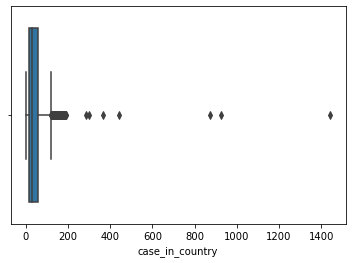

In [26]:
sns.boxplot(x='case_in_country',data=df)

In [27]:
df['case_in_country'].value_counts()

28.0     202
1.0       37
2.0       24
3.0       22
6.0       19
        ... 
149.0      1
147.0      1
141.0      1
135.0      1
140.0      1
Name: case_in_country, Length: 197, dtype: int64

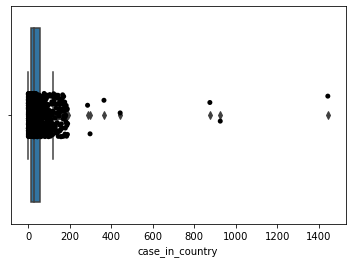

In [28]:
sns.boxplot(x='case_in_country',data=df)
sns.stripplot(x='case_in_country',data=df,color="black")

In [29]:
df.describe()

,case_in_country,age,If_onset_approximated,visiting Wuhan,from Wuhan
count,1080.000000,839.000000,556.000000,1080.000000,1080.000000
mean,45.137963,49.545590,0.043165,0.175926,0.144444
std,71.937031,18.207504,0.203412,0.380934,0.351703
min,1.000000,0.250000,0.000000,0.000000,0.000000
25%,14.000000,35.000000,0.000000,0.000000,0.000000
50%,28.000000,51.000000,0.000000,0.000000,0.000000
75%,56.000000,64.000000,0.000000,0.000000,0.000000
max,1443.000000,96.000000,1.000000,1.000000,1.000000


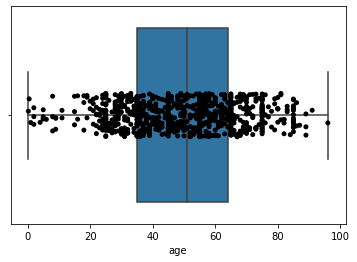

In [30]:
sns.boxplot(x='age',data=df)
sns.stripplot(x='age',data=df,color='black')

In [31]:
df['age'].median()

51.0

In [32]:
df['age'].fillna(df['age'].median(),inplace = True)

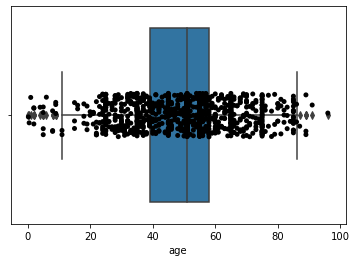

In [33]:
sns.boxplot(x='age',data=df)
sns.stripplot(x='age',data=df,color='black')

In [34]:
df.isna().sum()

case_in_country            0
reporting date             0
summary                    0
location                   0
country                    0
gender                   182
age                        0
symptom_onset            521
If_onset_approximated    524
hosp_visit_date          577
visiting Wuhan             0
from Wuhan                 0
death                      0
recovered                  0
source                     0
link                       0
dtype: int64

In [35]:
df['gender'].mode()[0]

'male'

In [36]:
df['gender'].fillna(df['gender'].mode()[0],inplace=True)

In [37]:
df['gender'].value_counts()

male      700
female    380
Name: gender, dtype: int64

In [38]:
df.isna().sum()

case_in_country            0
reporting date             0
summary                    0
location                   0
country                    0
gender                     0
age                        0
symptom_onset            521
If_onset_approximated    524
hosp_visit_date          577
visiting Wuhan             0
from Wuhan                 0
death                      0
recovered                  0
source                     0
link                       0
dtype: int64

In [39]:
df

,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,visiting Wuhan,from Wuhan,death,recovered,source,link
0,28.0,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,01/11/20,1,0.0,0,0,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,28.0,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,0,1.0,0,0,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,28.0,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,0.0,1/17/2020,0,1.0,0,0,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,28.0,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,1/19/2020,1,0.0,0,0,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
4,28.0,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,1/14/2020,0,0.0,0,0,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,2.0,2/25/2020,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,male,24.0,NaN,NaN,NaN,0,0.0,0,0,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...
1081,1.0,2/24/2020,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,male,35.0,NaN,NaN,NaN,0,0.0,0,0,Fox News,https://www.foxnews.com/health/afghanistan-fir...
1082,1.0,2/26/2020,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,51.0,NaN,NaN,NaN,0,0.0,0,0,South China Morning Post,https://www.scmp.com/news/china/society/articl...
1083,1.0,2/25/2020,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,51.0,NaN,NaN,NaN,0,0.0,0,0,Reuters,https://www.reuters.com/article/us-croatia-cor...


In [40]:
df['hosp_visit_date'].fillna(df['hosp_visit_date'].mode()[0],inplace=True)

In [41]:
df.isna().sum()

case_in_country            0
reporting date             0
summary                    0
location                   0
country                    0
gender                     0
age                        0
symptom_onset            521
If_onset_approximated    524
hosp_visit_date            0
visiting Wuhan             0
from Wuhan                 0
death                      0
recovered                  0
source                     0
link                       0
dtype: int64

In [42]:
df['If_onset_approximated'].fillna(df['If_onset_approximated'].mode()[0],inplace=True)

In [43]:
df['symptom_onset'].fillna(df['symptom_onset'].mode()[0],inplace=True)

In [44]:
df.isna().sum()

case_in_country          0
reporting date           0
summary                  0
location                 0
country                  0
gender                   0
age                      0
symptom_onset            0
If_onset_approximated    0
hosp_visit_date          0
visiting Wuhan           0
from Wuhan               0
death                    0
recovered                0
source                   0
link                     0
dtype: int64

In [45]:
df.head(5)

,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,visiting Wuhan,from Wuhan,death,recovered,source,link
0,28.0,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,01/11/20,1,0.0,0,0,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,28.0,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,0,1.0,0,0,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,28.0,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,0.0,1/17/2020,0,1.0,0,0,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,28.0,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,1/23/2020,0.0,1/19/2020,1,0.0,0,0,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
4,28.0,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,1/23/2020,0.0,1/14/2020,0,0.0,0,0,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?


In [46]:
df.describe()

,case_in_country,age,If_onset_approximated,visiting Wuhan,from Wuhan
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,45.137963,49.870139,0.022222,0.175926,0.144444
std,71.937031,16.057245,0.147474,0.380934,0.351703
min,1.000000,0.250000,0.000000,0.000000,0.000000
25%,14.000000,39.000000,0.000000,0.000000,0.000000
50%,28.000000,51.000000,0.000000,0.000000,0.000000
75%,56.000000,58.000000,0.000000,0.000000,0.000000
max,1443.000000,96.000000,1.000000,1.000000,1.000000


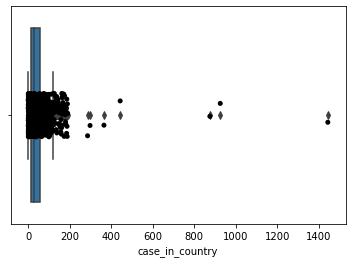

In [47]:
sns.boxplot(x='case_in_country',data=df)
sns.stripplot(x='case_in_country',data=df,color='black')

# handle outliers

In [48]:
#from scipy.stats import zscore
#df.loc[np.abs(stats.zscore(df['case_in_country']))>3,'case_in_country']=df['case_in_country'].median()

In [49]:
Q1=df['case_in_country'].quantile(0.25)
Q3=df['case_in_country'].quantile(0.75)
IQR=Q3-Q1

In [50]:
df.loc[(df['case_in_country'] < (Q1 - 1.5 * IQR)) | (df['case_in_country'] > (Q3 + 1.5 * IQR)), 'case_in_country']=df['case_in_country'].median()

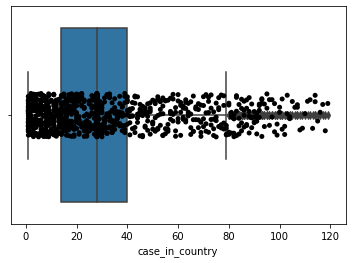

In [51]:
sns.boxplot(x='case_in_country',data=df)
sns.stripplot(x='case_in_country',data=df,color='black')

In [52]:
df.describe()

,case_in_country,age,If_onset_approximated,visiting Wuhan,from Wuhan
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,32.555556,49.870139,0.022222,0.175926,0.144444
std,26.124048,16.057245,0.147474,0.380934,0.351703
min,1.000000,0.250000,0.000000,0.000000,0.000000
25%,14.000000,39.000000,0.000000,0.000000,0.000000
50%,28.000000,51.000000,0.000000,0.000000,0.000000
75%,40.000000,58.000000,0.000000,0.000000,0.000000
max,119.000000,96.000000,1.000000,1.000000,1.000000


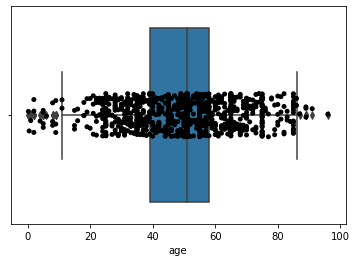

In [53]:
sns.boxplot(x='age',data=df)
sns.stripplot(x='age',data=df,color='black')

In [54]:
Q1=df['age'].quantile(0.25)
Q3=df['age'].quantile(0.75)
IQR=Q3-Q1

In [55]:
df.loc[(df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR)), 'age']=df['age'].median()

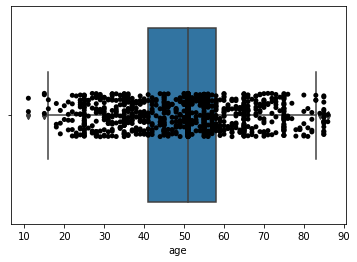

In [56]:
sns.boxplot(x='age',data=df)
sns.stripplot(x='age',data=df,color='black')

In [57]:
df.describe()

,case_in_country,age,If_onset_approximated,visiting Wuhan,from Wuhan
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,32.555556,50.420370,0.022222,0.175926,0.144444
std,26.124048,14.650742,0.147474,0.380934,0.351703
min,1.000000,11.000000,0.000000,0.000000,0.000000
25%,14.000000,41.000000,0.000000,0.000000,0.000000
50%,28.000000,51.000000,0.000000,0.000000,0.000000
75%,40.000000,58.000000,0.000000,0.000000,0.000000
max,119.000000,86.000000,1.000000,1.000000,1.000000


In [58]:
df.head(5)

,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,visiting Wuhan,from Wuhan,death,recovered,source,link
0,28.0,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,01/11/20,1,0.0,0,0,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,28.0,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,0,1.0,0,0,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,28.0,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,0.0,1/17/2020,0,1.0,0,0,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,28.0,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,1/23/2020,0.0,1/19/2020,1,0.0,0,0,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
4,28.0,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,1/23/2020,0.0,1/14/2020,0,0.0,0,0,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?


In [59]:
col=df.columns
col

Index(['case_in_country', 'reporting date', 'summary', 'location', 'country',
       'gender', 'age', 'symptom_onset', 'If_onset_approximated',
       'hosp_visit_date', 'visiting Wuhan', 'from Wuhan', 'death', 'recovered',
       'source', 'link'],
      dtype='object')

In [61]:
df=pd.get_dummies(df,columns=[ 'case_in_country', 'reporting date', 'summary', 'location',
       'country', 'gender', 'age', 'symptom_onset', 'If_onset_approximated',
       'hosp_visit_date', 'visiting Wuhan', 'from Wuhan', 'death', 'recovered',
       'source', 'link'],drop_first=True)

In [62]:
df

,case_in_country_2.0,case_in_country_3.0,case_in_country_4.0,case_in_country_5.0,case_in_country_6.0,case_in_country_7.0,case_in_country_8.0,case_in_country_9.0,case_in_country_10.0,case_in_country_11.0,...,link_https://www.weibo.com/2803301701/IqGV4lCay?from=page_1002062803301701_profile&wvr=6&mod=weibotime&type=comment#_rnd1579701703144,link_https://www.weibo.com/2803301701/IqGpc5njk?from=page_1002062803301701_profile&wvr=6&mod=weibotime&type=comment#_rnd1579700150699,link_https://www.weibo.com/2803301701/IqGtrCQPF?from=page_1002062803301701_profile&wvr=6&mod=weibotime&type=comment#_rnd1579700189479,link_https://www.weibo.com/2803301701/IqIgXzszS?filter=hot&root_comment_id=0&type=comment#_rnd1579733299141,link_https://www.weibo.com/2803301701/IqPMidEzh?from=page_1002062803301701_profile&wvr=6&mod=weibotime&type=comment#_rnd1579799658694,link_https://www3.nhk.or.jp/nhkworld/en/news/20200116_23/,link_https://www3.nhk.or.jp/nhkworld/en/news/20200124_14/,link_https://www3.nhk.or.jp/nhkworld/en/news/20200126_31/,link_https://www3.nhk.or.jp/nhkworld/en/news/20200130_02/,link_https://www3.nhk.or.jp/nhkworld/en/news/20200131_01/
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1081,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1082,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
